In [27]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [28]:
my_playlist = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Machine Learning\spotify\myplaylist_spotify\data\my_playlist.csv')
kanye_west = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Machine Learning\spotify\myplaylist_spotify\data\Kanye West.csv')
kendrick_lamar = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Machine Learning\spotify\myplaylist_spotify\data\Kendrick Lamar.csv')

my_playlist = my_playlist.drop(columns=['Unnamed: 0'])
kanye_west = kanye_west.drop(columns=['Unnamed: 0'])
kendrick_lamar = kendrick_lamar.drop(columns=['Unnamed: 0'])

my_playlist['year'] = my_playlist['release_date'].str.slice(0,4)
kanye_west['year'] = kanye_west['release_date'].str.slice(0,4)
kendrick_lamar['year'] = kendrick_lamar['release_date'].str.slice(0,4)


In [29]:
my_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              187 non-null    object 
 1   artist            187 non-null    object 
 2   album             187 non-null    object 
 3   duration_sec      187 non-null    float64
 4   popularity        187 non-null    int64  
 5   release_date      187 non-null    object 
 6   album_image_url   187 non-null    object 
 7   artist_image_url  187 non-null    object 
 8   genres            174 non-null    object 
 9   track_id          187 non-null    object 
 10  genre_count       187 non-null    int64  
 11  genre_1           174 non-null    object 
 12  genre_2           170 non-null    object 
 13  genre_3           148 non-null    object 
 14  genre_4           76 non-null     object 
 15  genre_5           33 non-null     object 
 16  genre_6           5 non-null      object 
 1

In [30]:
my_playlist

,name,artist,album,duration_sec,popularity,release_date,album_image_url,artist_image_url,genres,track_id,genre_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,year
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,https://i.scdn.co/image/ab6761610000e5eb7565b3...,"atl hip hop, hip hop, rap, southern hip hop, trap",2tudvzsrR56uom6smgOcSf,5,atl hip hop,hip hop,rap,southern hip hop,trap,NaN,NaN,2024
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,https://i.scdn.co/image/ab6761610000e5ebdf9a15...,rap,3SsJ17EnPIu1B4GZshqjIS,1,rap,NaN,NaN,NaN,NaN,NaN,NaN,2022
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",6BU1RZexmvJcBjgagVVt3M,4,conscious hip hop,hip hop,rap,west coast rap,NaN,NaN,NaN,2022
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,https://i.scdn.co/image/ab6761610000e5ebf4e110...,NaN,3w0w2T288dec0mgeZZqoNN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,https://i.scdn.co/image/ab6761610000e5eb6e835a...,"chicago rap, hip hop, rap",0WSEq9Ko4kFPt8yo3ICd6T,3,chicago rap,hip hop,rap,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Wet Dreamz,J. Cole,2014 Forest Hills Drive,239.266,80,2014-12-09,https://i.scdn.co/image/ab67616d0000b273c6e094...,https://i.scdn.co/image/ab6761610000e5eb4b053c...,"conscious hip hop, hip hop, north carolina hip...",4tqcoej1zPvwePZCzuAjJd,4,conscious hip hop,hip hop,north carolina hip hop,rap,NaN,NaN,NaN,2014
183,LUST.,Kendrick Lamar,DAMN.,307.880,64,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",06FCvd7rrRcF3DdvWH5Isp,4,conscious hip hop,hip hop,rap,west coast rap,NaN,NaN,NaN,2017
184,YAH.,Kendrick Lamar,DAMN.,160.293,66,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",4BHSjbYylfOH5WAGusDyni,4,conscious hip hop,hip hop,rap,west coast rap,NaN,NaN,NaN,2017
185,Bank Account,21 Savage,Issa Album,220.306,73,2017-07-06,https://i.scdn.co/image/ab67616d0000b273271934...,https://i.scdn.co/image/ab6761610000e5eb4f8f76...,"atl hip hop, hip hop, rap",5eqK0tbzUPo2SoeZsov04s,3,atl hip hop,hip hop,rap,NaN,NaN,NaN,NaN,2017


In [31]:
# Separar la columna 'genres' por comas y expandir los resultados en columnas
genres_split = my_playlist['genres'].str.split(', ', expand=True)

# Renombrar las columnas resultantes
genres_split.columns = [f'genre_{i+1}' for i in range(genres_split.shape[1])]

# Convertir todos los valores de la columna 'genres' a cadenas por si acaso hay valores no string
my_playlist['genres'] = my_playlist['genres'].astype(str)

# Contar la cantidad de géneros en cada fila
my_playlist['genre_count'] = my_playlist['genres'].apply(lambda x: len(x.split(', ')))

# Unir el DataFrame original con el DataFrame de géneros separados
my_playlist = pd.concat([my_playlist, genres_split], axis=1)

In [32]:
my_playlist = my_playlist.drop(columns = ['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'])

In [33]:
my_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              187 non-null    object 
 1   artist            187 non-null    object 
 2   album             187 non-null    object 
 3   duration_sec      187 non-null    float64
 4   popularity        187 non-null    int64  
 5   release_date      187 non-null    object 
 6   album_image_url   187 non-null    object 
 7   artist_image_url  187 non-null    object 
 8   genres            187 non-null    object 
 9   track_id          187 non-null    object 
 10  genre_count       187 non-null    int64  
 11  year              187 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.7+ KB


In [34]:
#artistas con mas presencia en mi playlist

artist_frecuency =  my_playlist.groupby('artist')['name'].count().sort_values(ascending=False).reset_index()
artist_frecuency.head()

,artist,name
0,Kanye West,39
1,Kendrick Lamar,33
2,Drake,12
3,¥$,10
4,21 Savage,10


In [35]:
#canciones con mayor duracion
songs_time = my_playlist.groupby('name')['duration_sec'].sum().reset_index().sort_values('duration_sec', ascending=False)
songs_time['duration_min'] = songs_time['duration_sec'] / 60 
songs_time

,name,duration_sec,duration_min
141,"Sing About Me, I'm Dying Of Thirst",723.573,12.059550
132,Runaway,547.733,9.128883
7,4 Your Eyez Only,530.253,8.837550
67,"God Is Fair, Sexy Nasty (feat. Kendrick Lamar)",500.960,8.349333
6,3500 (feat. Future & 2 Chainz),461.840,7.697333
...,...,...,...
47,Every Hour,112.239,1.870650
17,BURN,111.458,1.857633
61,Follow God,104.591,1.743183
138,Serio,64.693,1.078217


In [36]:
#albumes con mas canciones en mi playlist
albumes = my_playlist.groupby(['album', 'artist'])['name'].count().reset_index().sort_values('name', ascending=False) 
albumes

,album,artist,name
18,DAMN.,Kendrick Lamar,10
81,VULTURES 1,¥$,9
78,To Pimp A Butterfly,Kendrick Lamar,8
75,The Life Of Pablo,Kanye West,7
23,Donda,Kanye West,7
...,...,...,...
85,Watch The Throne,JAY-Z,1
93,"good kid, m.A.A.d city (Deluxe)",Kendrick Lamar,1
91,euphoria,Kendrick Lamar,1
90,balearico,Rels B,1


In [37]:
#artistas con mas aalbumes en mi playlist
artist_album = my_playlist.groupby('artist')['album'].nunique().reset_index().sort_values('album', ascending=False) 
artist_album.head()

,artist,album
25,Kanye West,11
26,Kendrick Lamar,8
12,Drake,6
42,Travis Scott,5
0,21 Savage,5


In [38]:
#albumes con mayor popularidad den mi playlist
album_popular = my_playlist.groupby(['album', 'artist'])['popularity'].mean().reset_index().sort_values('popularity', ascending=False) 
album_popular

,album,artist,popularity
51,Not Like Us,Kendrick Lamar,90.000000
9,Big Dawgs,Hanumankind,89.000000
10,Birds In The Trap Sing McKnight,Travis Scott,86.000000
1,17,XXXTENTACION,84.000000
36,I Smoked Away My Brain (I'm God x Demons Mashu...,A$AP Rocky,83.000000
...,...,...,...
81,VULTURES 1,¥$,38.111111
13,Can't Be Stopped,EFESIAN,38.000000
87,YEYO,Lil Supa,37.000000
63,Serio,Lil Supa,29.000000


In [39]:
#albumes con mas generos 
genres_count = my_playlist.groupby('album')['genre_count'].mean().reset_index().sort_values('genre_count', ascending=False) 
genres_count

,album,genre_count
50,Nellyville,7.0
30,Get Rich Or Die Tryin',6.0
53,Oxymoron (Deluxe),6.0
54,Pink Tape,6.0
21,Die Lit,5.0
...,...,...
43,Love Sick,1.0
81,VULTURES 1,1.0
74,The King's Affirmation,1.0
83,Vent,1.0


In [40]:
#aartista con mas generos
artist_genre_count = my_playlist.groupby('artist')['genre_count'].mean().reset_index()
artist_genre_count.head()

,artist,genre_count
0,21 Savage,3.0
1,50 Cent,6.0
2,A$AP Mob,4.0
3,A$AP Rocky,3.0
4,Aaron May,1.0


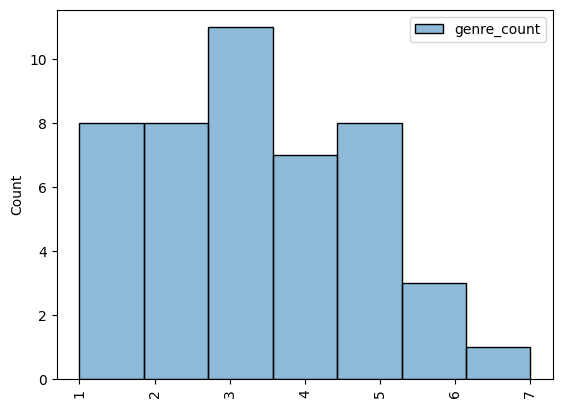

In [41]:
sns.histplot(artist_genre_count)
plt.xticks(rotation = 
           90)
plt.show()

In [42]:
my_playlist['year'] = my_playlist['release_date'].str.slice(0,4)
my_playlist

,name,artist,album,duration_sec,popularity,release_date,album_image_url,artist_image_url,genres,track_id,genre_count,year
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,https://i.scdn.co/image/ab6761610000e5eb7565b3...,"atl hip hop, hip hop, rap, southern hip hop, trap",2tudvzsrR56uom6smgOcSf,5,2024
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,https://i.scdn.co/image/ab6761610000e5ebdf9a15...,rap,3SsJ17EnPIu1B4GZshqjIS,1,2022
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",6BU1RZexmvJcBjgagVVt3M,4,2022
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,https://i.scdn.co/image/ab6761610000e5ebf4e110...,nan,3w0w2T288dec0mgeZZqoNN,1,2024
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,https://i.scdn.co/image/ab6761610000e5eb6e835a...,"chicago rap, hip hop, rap",0WSEq9Ko4kFPt8yo3ICd6T,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
182,Wet Dreamz,J. Cole,2014 Forest Hills Drive,239.266,80,2014-12-09,https://i.scdn.co/image/ab67616d0000b273c6e094...,https://i.scdn.co/image/ab6761610000e5eb4b053c...,"conscious hip hop, hip hop, north carolina hip...",4tqcoej1zPvwePZCzuAjJd,4,2014
183,LUST.,Kendrick Lamar,DAMN.,307.880,64,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",06FCvd7rrRcF3DdvWH5Isp,4,2017
184,YAH.,Kendrick Lamar,DAMN.,160.293,66,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",4BHSjbYylfOH5WAGusDyni,4,2017
185,Bank Account,21 Savage,Issa Album,220.306,73,2017-07-06,https://i.scdn.co/image/ab67616d0000b273271934...,https://i.scdn.co/image/ab6761610000e5eb4f8f76...,"atl hip hop, hip hop, rap",5eqK0tbzUPo2SoeZsov04s,3,2017


In [43]:

my_playlist['release_date'] = pd.to_datetime(my_playlist['release_date'], errors = 'coerce')


In [44]:
fecha_inicio = my_playlist['release_date']

fecha_hoy = pd.to_datetime(datetime.now())

my_playlist['days'] = (fecha_hoy - fecha_inicio).dt.days

my_playlist

,name,artist,album,duration_sec,popularity,release_date,album_image_url,artist_image_url,genres,track_id,genre_count,year,days
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,https://i.scdn.co/image/ab6761610000e5eb7565b3...,"atl hip hop, hip hop, rap, southern hip hop, trap",2tudvzsrR56uom6smgOcSf,5,2024,210.0
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,https://i.scdn.co/image/ab6761610000e5ebdf9a15...,rap,3SsJ17EnPIu1B4GZshqjIS,1,2022,686.0
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",6BU1RZexmvJcBjgagVVt3M,4,2022,889.0
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,https://i.scdn.co/image/ab6761610000e5ebf4e110...,nan,3w0w2T288dec0mgeZZqoNN,1,2024,252.0
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,https://i.scdn.co/image/ab6761610000e5eb6e835a...,"chicago rap, hip hop, rap",0WSEq9Ko4kFPt8yo3ICd6T,3,2021,1146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Wet Dreamz,J. Cole,2014 Forest Hills Drive,239.266,80,2014-12-09,https://i.scdn.co/image/ab67616d0000b273c6e094...,https://i.scdn.co/image/ab6761610000e5eb4b053c...,"conscious hip hop, hip hop, north carolina hip...",4tqcoej1zPvwePZCzuAjJd,4,2014,3601.0
183,LUST.,Kendrick Lamar,DAMN.,307.880,64,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",06FCvd7rrRcF3DdvWH5Isp,4,2017,2744.0
184,YAH.,Kendrick Lamar,DAMN.,160.293,66,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",4BHSjbYylfOH5WAGusDyni,4,2017,2744.0
185,Bank Account,21 Savage,Issa Album,220.306,73,2017-07-06,https://i.scdn.co/image/ab67616d0000b273271934...,https://i.scdn.co/image/ab6761610000e5eb4f8f76...,"atl hip hop, hip hop, rap",5eqK0tbzUPo2SoeZsov04s,3,2017,2661.0


In [45]:
year_song = my_playlist.groupby('year')['name'].count().reset_index()
year_song

,year,name
0,2002,1
1,2003,2
2,2004,2
3,2007,6
4,2009,1
5,2010,5
6,2011,9
7,2012,5
8,2013,4
9,2014,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2002'),
  Text(1, 0, '2003'),
  Text(2, 0, '2004'),
  Text(3, 0, '2007'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022'),
  Text(18, 0, '2023'),
  Text(19, 0, '2024')])

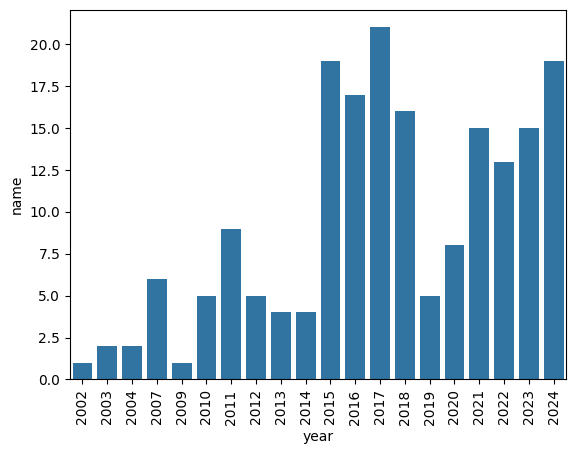

In [46]:
sns.barplot(year_song, x = 'year', y = 'name')
plt.xticks(rotation = 90)

In [47]:
kanye_west.head()

,album,track_name,track_id,duration_sec,popularity,release_date,artist,year
0,VULTURES 2,SLIDE,5MGMXOhVvwzCjFgdQsFokR,197.777,65,2024-08-03,Kanye West,2024
1,VULTURES 2,TIME MOVING SLOW,0JgassGI6jNxpX82jGpcuJ,159.669,63,2024-08-03,Kanye West,2024
2,VULTURES 2,FIELD TRIP,7vv89PswQvqGKCGJ1rw5on,163.155,77,2024-08-03,Kanye West,2024
3,VULTURES 2,FRIED,4Qay2jEWJYjXmJ8eNOGtaD,166.400,66,2024-08-03,Kanye West,2024
4,VULTURES 2,ISABELLA,36XrocrUkmem00MPm2kIst,8.895,9,2024-08-03,Kanye West,2024


In [48]:
my_playlist.head()

,name,artist,album,duration_sec,popularity,release_date,album_image_url,artist_image_url,genres,track_id,genre_count,year,days
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,https://i.scdn.co/image/ab6761610000e5eb7565b3...,"atl hip hop, hip hop, rap, southern hip hop, trap",2tudvzsrR56uom6smgOcSf,5,2024,210.0
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,https://i.scdn.co/image/ab6761610000e5ebdf9a15...,rap,3SsJ17EnPIu1B4GZshqjIS,1,2022,686.0
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,https://i.scdn.co/image/ab6761610000e5eb437b9e...,"conscious hip hop, hip hop, rap, west coast rap",6BU1RZexmvJcBjgagVVt3M,4,2022,889.0
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,https://i.scdn.co/image/ab6761610000e5ebf4e110...,nan,3w0w2T288dec0mgeZZqoNN,1,2024,252.0
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,https://i.scdn.co/image/ab6761610000e5eb6e835a...,"chicago rap, hip hop, rap",0WSEq9Ko4kFPt8yo3ICd6T,3,2021,1146.0


In [49]:
resultado = pd.merge(
    kanye_west,
    my_playlist[['album', 'album_image_url']],
    on = 'album',
    how = 'left'
    
)

In [50]:
resultado

,album,track_name,track_id,duration_sec,popularity,release_date,artist,year,album_image_url
0,VULTURES 2,SLIDE,5MGMXOhVvwzCjFgdQsFokR,197.777,65,2024-08-03,Kanye West,2024,https://i.scdn.co/image/ab67616d0000b273215777...
1,VULTURES 2,TIME MOVING SLOW,0JgassGI6jNxpX82jGpcuJ,159.669,63,2024-08-03,Kanye West,2024,https://i.scdn.co/image/ab67616d0000b273215777...
2,VULTURES 2,FIELD TRIP,7vv89PswQvqGKCGJ1rw5on,163.155,77,2024-08-03,Kanye West,2024,https://i.scdn.co/image/ab67616d0000b273215777...
3,VULTURES 2,FRIED,4Qay2jEWJYjXmJ8eNOGtaD,166.400,66,2024-08-03,Kanye West,2024,https://i.scdn.co/image/ab67616d0000b273215777...
4,VULTURES 2,ISABELLA,36XrocrUkmem00MPm2kIst,8.895,9,2024-08-03,Kanye West,2024,https://i.scdn.co/image/ab67616d0000b273215777...
...,...,...,...,...,...,...,...,...,...
860,The College Dropout,Lil Jimmy Skit,4BhwlQ9mTwhFGXpQvP9JTV,53.640,51,2004-02-10,Kanye West,2004,https://i.scdn.co/image/ab67616d0000b27325b055...
861,The College Dropout,Two Words,62wtttQzoIA9HnNmGVd9Yq,266.213,61,2004-02-10,Kanye West,2004,https://i.scdn.co/image/ab67616d0000b27325b055...
862,The College Dropout,Through The Wire,4mmkhcEm1Ljy1U9nwtsxUo,221.226,74,2004-02-10,Kanye West,2004,https://i.scdn.co/image/ab67616d0000b27325b055...
863,The College Dropout,Family Business,5DBmXF7QO43Cuy9yqva116,278.893,65,2004-02-10,Kanye West,2004,https://i.scdn.co/image/ab67616d0000b27325b055...
